In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
dataset_train = pd.read_csv('/kaggle/input/action-units-all/all.csv')

In [5]:
p = dataset_train[(dataset_train['id'] >= 47) & (dataset_train['id'] <= 60)]


In [14]:
F  = p[p['classe']==2] 

In [17]:
unique_count = F['end_seq'].unique()

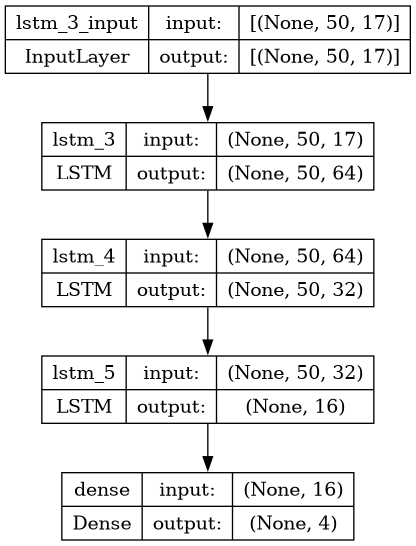

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import plot_model

# Create a Sequential model
model = Sequential()

# Add LSTM layers to the model
model.add(LSTM(64, input_shape=(50, 17), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))

# Add a Dense output layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [16]:
unique_count

337

In [123]:
s = dataset_train[(dataset_train['id'] >= 1) & (dataset_train['id'] <= 26)]

In [124]:
s

,id,classe,frame,end_seq,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,1,1,19,32,0.0,0.0,1.63,0.0,0.06,0.00,...,0.52,0.67,1.31,0.00,1.54,1.20,0.21,0.27,0.54,0.00
1,1,1,20,32,0.0,0.0,1.57,0.0,0.04,0.00,...,0.51,0.65,1.30,0.00,1.56,1.18,0.21,0.29,0.54,0.00
2,1,1,21,32,0.0,0.0,1.51,0.0,0.03,0.00,...,0.51,0.64,1.29,0.00,1.56,1.14,0.22,0.31,0.55,0.00
3,1,1,22,32,0.0,0.0,1.52,0.0,0.11,0.00,...,0.55,0.75,1.44,0.00,1.48,1.01,0.24,0.50,0.58,0.00
4,1,1,23,32,0.0,0.0,1.55,0.0,0.19,0.00,...,0.61,0.88,1.56,0.00,1.37,0.89,0.25,0.71,0.59,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186868,26,1,11792,11796,0.0,0.0,0.27,0.0,1.97,2.17,...,2.89,1.71,2.40,0.58,4.46,1.13,2.12,0.00,0.78,0.12
186869,26,1,11793,11796,0.0,0.0,0.26,0.0,1.96,2.11,...,2.55,1.67,2.53,0.35,4.19,1.27,2.20,0.00,1.23,0.06
186870,26,1,11794,11796,0.0,0.0,0.21,0.0,1.91,1.90,...,2.22,1.68,2.67,0.08,3.90,1.32,2.26,0.00,1.58,0.00
186871,26,1,11795,11796,0.0,0.0,0.15,0.0,1.85,1.87,...,1.97,1.80,2.80,0.00,3.50,1.05,2.10,0.00,1.70,0.00


In [69]:
appended_row = dataset_train.iloc[1:4, :]

In [103]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select columns to be normalized
cols_to_normalize = [col for col in dataset_train.columns if col not in ['id', 'classe', 'frame', 'end_seq']]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df_normalized = dataset_train.copy()
for col in cols_to_normalize:
    # Reshape the column to a 2D array and normalize
    df_normalized[col] = scaler.fit_transform(df_normalized[col].values.reshape(-1, 1))

# Now df_normalized contains normalized values except for 'id', 'classe', 'frame', and 'end_seq' columns


In [126]:
p

,id,classe,frame,end_seq,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
186873,47,4,227,350,0.000,0.000000,0.055882,0.0,0.553806,0.146993,...,0.237903,0.421308,0.429448,0.0,0.018,0.130,0.000000,0.000,0.000,0.010373
186874,47,4,228,350,0.000,0.000000,0.064706,0.0,0.551181,0.189310,...,0.231855,0.433414,0.396728,0.0,0.038,0.128,0.000000,0.002,0.000,0.000000
186875,47,4,229,350,0.000,0.000000,0.094118,0.0,0.540682,0.162584,...,0.199597,0.428571,0.384458,0.0,0.042,0.120,0.004348,0.012,0.000,0.000000
186876,47,4,230,350,0.000,0.000000,0.111765,0.0,0.527559,0.160356,...,0.179435,0.418886,0.415133,0.0,0.056,0.102,0.013043,0.018,0.000,0.000000
186877,47,4,231,350,0.000,0.000000,0.073529,0.0,0.522310,0.131403,...,0.159274,0.399516,0.421268,0.0,0.044,0.088,0.015217,0.034,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302068,60,1,14671,14675,0.246,0.088095,0.402941,0.0,0.233596,0.394209,...,0.336694,0.084746,0.402863,0.0,0.050,0.000,0.000000,0.178,0.030,0.029046
302069,60,1,14672,14675,0.238,0.011905,0.391176,0.0,0.259843,0.514477,...,0.322581,0.094431,0.411043,0.0,0.052,0.000,0.000000,0.146,0.038,0.041494
302070,60,1,14673,14675,0.206,0.000000,0.388235,0.0,0.278215,0.541203,...,0.336694,0.099274,0.423313,0.0,0.072,0.000,0.000000,0.112,0.042,0.037344
302071,60,1,14674,14675,0.164,0.000000,0.373529,0.0,0.286089,0.565702,...,0.328629,0.092010,0.429448,0.0,0.064,0.000,0.000000,0.062,0.042,0.062241


In [130]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'p' is the DataFrame containing your data

# Select columns to be normalized
cols_to_normalize = [col for col in p.columns if col not in ['id', 'classe', 'frame', 'end_seq']]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df_normalized = p.copy()  # Create a copy of the original DataFrame
for col in cols_to_normalize:
    # Reshape the column to a 2D array and normalize
    p[col] = scaler.fit_transform(p[col].values.reshape(-1, 1))

# Now df_normalized contains normalized values except for 'id', 'classe', 'frame', and 'end_seq' columns


/tmp/ipykernel_34/2018560911.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p[col] = scaler.fit_transform(p[col].values.reshape(-1, 1))
/tmp/ipykernel_34/2018560911.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p[col] = scaler.fit_transform(p[col].values.reshape(-1, 1))
/tmp/ipykernel_34/2018560911.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [132]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'p' is the DataFrame containing your data

# Select columns to be normalized
cols_to_normalize = [col for col in s.columns if col not in ['id', 'classe', 'frame', 'end_seq']]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df_normalized = s.copy()  # Create a copy of the original DataFrame
for col in cols_to_normalize:
    # Reshape the column to a 2D array and normalize
    s[col] = scaler.fit_transform(s[col].values.reshape(-1, 1))

# Now df_normalized contains normalized values except for 'id', 'classe', 'frame', and 'end_seq' columns


/tmp/ipykernel_34/3098691299.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[col] = scaler.fit_transform(s[col].values.reshape(-1, 1))
/tmp/ipykernel_34/3098691299.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[col] = scaler.fit_transform(s[col].values.reshape(-1, 1))
/tmp/ipykernel_34/3098691299.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [104]:
ACTION_COL = ["AU01_r", 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
              'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']

data = df_normalized.sort_values(by=['id', 'end_seq'])

# Initialize variables to store previous id and class
prev_id = 1
prev_class = 1
current_ssignal = []
labels = []

# List to store sequences
sequences = []

for index, row in data.iterrows():
    current_id = row['id']
    current_class = row['classe']
    
    if prev_id == current_id and prev_class == current_class and row['end_seq'] - row['frame'] >= 0:
        current_ssignal.append(row[ACTION_COL].values)  # Append the row directly, not in a list
        
    else:  # If current_ssignal is not empty, append it to sequences
        if current_ssignal:
            # Check if the length of current_ssignal is at least 50
            if len(current_ssignal) >= 50:
                # Divide the sequence into segments of length 50
                for i in range(0, len(current_ssignal), 50):
                    segment = current_ssignal[i:i+50]
                    # Check if the remaining part is less than 50, if so, discard it
                    if len(segment) == 50:
                        sequences.append(segment)
                        labels.append(prev_class)
            # Reset current_ssignal
            current_ssignal = []
        
    prev_id = current_id
    prev_class = current_class

# Append the last segment if it exists
if current_ssignal:
    # Check if the length of current_ssignal is at least 50
    if len(current_ssignal) >= 50:
        # Divide the sequence into segments of length 50
        for i in range(0, len(current_ssignal), 50):
            segment = current_ssignal[i:i+50]
            # Check if the remaining part is less than 50, if so, discard it
            if len(segment) == 50:
                sequences.append(segment)
                labels.append(prev_class)


In [134]:
ACTION_COL = ["AU01_r", 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
              'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']

data = p.sort_values(by=['id', 'end_seq'])

# Initialize variables to store previous id and class
prev_id = 1
prev_class = 1
current_ssignal = []
labels_p = []

# List to store sequences
sequences_p = []

for index, row in data.iterrows():
    current_id = row['id']
    current_class = row['classe']
    
    if prev_id == current_id and prev_class == current_class and row['end_seq'] - row['frame'] >= 0:
        current_ssignal.append(row[ACTION_COL].values)  # Append the row directly, not in a list
        
    else:  # If current_ssignal is not empty, append it to sequences
        if current_ssignal:
            # Check if the length of current_ssignal is at least 50
            if len(current_ssignal) >= 50:
                # Divide the sequence into segments of length 50
                for i in range(0, len(current_ssignal), 50):
                    segment = current_ssignal[i:i+50]
                    # Check if the remaining part is less than 50, if so, discard it
                    if len(segment) == 50:
                        sequences_p.append(segment)
                        labels_p.append(prev_class)
            # Reset current_ssignal
            current_ssignal = []
        
    prev_id = current_id
    prev_class = current_class

# Append the last segment if it exists
if current_ssignal:
    # Check if the length of current_ssignal is at least 50
    if len(current_ssignal) >= 50:
        # Divide the sequence into segments of length 50
        for i in range(0, len(current_ssignal), 50):
            segment = current_ssignal[i:i+50]
            # Check if the remaining part is less than 50, if so, discard it
            if len(segment) == 50:
                sequences_p.append(segment)
                labels_p.append(prev_class)


In [135]:
len(labels_p) == len(sequences_p)

True

In [136]:
ACTION_COL = ["AU01_r", 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
              'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']

data = s.sort_values(by=['id', 'end_seq'])

# Initialize variables to store previous id and class
prev_id = 1
prev_class = 1
current_ssignal = []
labels_s = []

# List to store sequences
sequences_s = []

for index, row in data.iterrows():
    current_id = row['id']
    current_class = row['classe']
    
    if prev_id == current_id and prev_class == current_class and row['end_seq'] - row['frame'] >= 0:
        current_ssignal.append(row[ACTION_COL].values)  # Append the row directly, not in a list
        
    else:  # If current_ssignal is not empty, append it to sequences
        if current_ssignal:
            # Check if the length of current_ssignal is at least 50
            if len(current_ssignal) >= 50:
                # Divide the sequence into segments of length 50
                for i in range(0, len(current_ssignal), 50):
                    segment = current_ssignal[i:i+50]
                    # Check if the remaining part is less than 50, if so, discard it
                    if len(segment) == 50:
                        sequences_s.append(segment)
                        labels_s.append(prev_class)
            # Reset current_ssignal
            current_ssignal = []
        
    prev_id = current_id
    prev_class = current_class

# Append the last segment if it exists
if current_ssignal:
    # Check if the length of current_ssignal is at least 50
    if len(current_ssignal) >= 50:
        # Divide the sequence into segments of length 50
        for i in range(0, len(current_ssignal), 50):
            segment = current_ssignal[i:i+50]
            # Check if the remaining part is less than 50, if so, discard it
            if len(segment) == 50:
                sequences_s.append(segment)
                labels_s.append(prev_class)


In [137]:
len(labels_s) == len(sequences_s)

True

In [140]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming you have sequences and labels defined
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_p)

# Convert sequences and labels to numpy arrays
sequences_np = np.array(sequences_p)
labels_encoded_np = np.array(labels_encoded)

# Define and compile the model
model = Sequential([
    LSTM(64, input_shape=(50, len(ACTION_COL)), return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(sequences_np, labels_encoded_np, epochs=64, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the entire dataset
predictions = model.predict(sequences_np)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate evaluation metrics
precision = precision_score(labels_encoded_np, predicted_classes, average='macro')
recall = recall_score(labels_encoded_np, predicted_classes, average='macro')
accuracy = accuracy_score(labels_encoded_np, predicted_classes)
f1 = f1_score(labels_encoded_np, predicted_classes, average='macro')
weighted_f1 = f1_score(labels_encoded_np, predicted_classes, average='weighted')

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Weighted F1 Score:", weighted_f1)


Epoch 1/64
45/45 [==============================] - 6s 35ms/step - loss: 1.0287 - accuracy: 0.5752 - val_loss: 0.9696 - val_accuracy: 0.4190
Epoch 2/64
45/45 [==============================] - 0s 11ms/step - loss: 0.9137 - accuracy: 0.5794 - val_loss: 0.7575 - val_accuracy: 0.6732
Epoch 3/64
45/45 [==============================] - 0s 11ms/step - loss: 0.7492 - accuracy: 0.7355 - val_loss: 0.5054 - val_accuracy: 0.8380
Epoch 4/64
45/45 [==============================] - 0s 11ms/step - loss: 0.6692 - accuracy: 0.7600 - val_loss: 0.4684 - val_accuracy: 0.8520
Epoch 5/64
45/45 [==============================] - 0s 11ms/step - loss: 0.6378 - accuracy: 0.7670 - val_loss: 0.4562 - val_accuracy: 0.8464
Epoch 6/64
45/45 [==============================] - 0s 11ms/step - loss: 0.6126 - accuracy: 0.7719 - val_loss: 0.4393 - val_accuracy: 0.8380
Epoch 7/64
45/45 [==============================] - 0s 11ms/step - loss: 0.5953 - accuracy: 0.7901 - val_loss: 0.4673 - val_accuracy: 0.8240
Epoch 8/64
45

In [138]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(50, len(ACTION_COL)), return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert sequences_p and sequences_s to numpy arrays
sequences_p_np = np.array(sequences_p)
sequences_s_np = np.array(sequences_s)

# Convert labels_p and labels_s to encoded numeric labels
labels_p_encoded = label_encoder.transform(labels_p)
labels_s_encoded = label_encoder.transform(labels_s)

# Train the model
model.fit(sequences_p_np, labels_p_encoded, epochs=64, batch_size=32, validation_split=0.2, verbose=1)

# Predict on sequences_s
predictions_s = model.predict(sequences_s_np)
predicted_classes_s = np.argmax(predictions_s, axis=1)

# Calculate evaluation metrics
precision_s = precision_score(labels_s_encoded, predicted_classes_s, average='macro')
recall_s = recall_score(labels_s_encoded, predicted_classes_s, average='macro')
accuracy_s = accuracy_score(labels_s_encoded, predicted_classes_s)
f1_s = f1_score(labels_s_encoded, predicted_classes_s, average='macro')
weighted_f1_s = f1_score(labels_s_encoded, predicted_classes_s, average='weighted')

# Print evaluation metrics for sequences_s
print("Precision (sequences_s):", precision_s)
print("Recall (sequences_s):", recall_s)
print("Accuracy (sequences_s):", accuracy_s)
print("F1 Score (sequences_s):", f1_s)
print("Weighted F1 Score (sequences_s):", weighted_f1_s)


Epoch 1/64
45/45 [==============================] - 6s 36ms/step - loss: 1.0117 - accuracy: 0.5507 - val_loss: 0.8680 - val_accuracy: 0.4609
Epoch 2/64
45/45 [==============================] - 1s 11ms/step - loss: 0.8303 - accuracy: 0.6207 - val_loss: 0.6471 - val_accuracy: 0.8212
Epoch 3/64
45/45 [==============================] - 1s 11ms/step - loss: 0.7716 - accuracy: 0.7138 - val_loss: 0.5754 - val_accuracy: 0.7989
Epoch 4/64
45/45 [==============================] - 1s 11ms/step - loss: 0.6752 - accuracy: 0.7649 - val_loss: 0.4874 - val_accuracy: 0.8436
Epoch 5/64
45/45 [==============================] - 1s 11ms/step - loss: 0.6357 - accuracy: 0.7803 - val_loss: 0.4857 - val_accuracy: 0.8184
Epoch 6/64
45/45 [==============================] - 1s 11ms/step - loss: 0.6342 - accuracy: 0.7621 - val_loss: 0.4553 - val_accuracy: 0.8408
Epoch 7/64
45/45 [==============================] - 1s 11ms/step - loss: 0.6049 - accuracy: 0.7880 - val_loss: 0.4610 - val_accuracy: 0.8352
Epoch 8/64
45

In [139]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(50, len(ACTION_COL)), return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert sequences_p and sequences_s to numpy arrays
sequences_p_np = np.array(sequences_p)
sequences_s_np = np.array(sequences_s)

# Convert labels_p and labels_s to encoded numeric labels
labels_p_encoded = label_encoder.transform(labels_p)
labels_s_encoded = label_encoder.transform(labels_s)

# Train the model on sequences_s
model.fit(sequences_s_np, labels_s_encoded, epochs=64, batch_size=32, validation_split=0.2, verbose=1)

# Predict on sequences_p
predictions_p = model.predict(sequences_p_np)
predicted_classes_p = np.argmax(predictions_p, axis=1)

# Calculate evaluation metrics for sequences_p
precision_p = precision_score(labels_p_encoded, predicted_classes_p, average='macro')
recall_p = recall_score(labels_p_encoded, predicted_classes_p, average='macro')
accuracy_p = accuracy_score(labels_p_encoded, predicted_classes_p)
f1_p = f1_score(labels_p_encoded, predicted_classes_p, average='macro')
weighted_f1_p = f1_score(labels_p_encoded, predicted_classes_p, average='weighted')

# Print evaluation metrics for sequences_p
print("Precision (sequences_p):", precision_p)
print("Recall (sequences_p):", recall_p)
print("Accuracy (sequences_p):", accuracy_p)
print("F1 Score (sequences_p):", f1_p)
print("Weighted F1 Score (sequences_p):", weighted_f1_p)


Epoch 1/64
69/69 [==============================] - 6s 25ms/step - loss: 1.0530 - accuracy: 0.5748 - val_loss: 0.9806 - val_accuracy: 0.5945
Epoch 2/64
69/69 [==============================] - 1s 10ms/step - loss: 0.8727 - accuracy: 0.6713 - val_loss: 0.9277 - val_accuracy: 0.6661
Epoch 3/64
69/69 [==============================] - 1s 10ms/step - loss: 0.8327 - accuracy: 0.6777 - val_loss: 0.8910 - val_accuracy: 0.6330
Epoch 4/64
69/69 [==============================] - 1s 10ms/step - loss: 0.8003 - accuracy: 0.6919 - val_loss: 0.8114 - val_accuracy: 0.6679
Epoch 5/64
69/69 [==============================] - 1s 10ms/step - loss: 0.7833 - accuracy: 0.7080 - val_loss: 0.8203 - val_accuracy: 0.6569
Epoch 6/64
69/69 [==============================] - 1s 10ms/step - loss: 0.7709 - accuracy: 0.7167 - val_loss: 0.8282 - val_accuracy: 0.6936
Epoch 7/64
69/69 [==============================] - 1s 10ms/step - loss: 0.7649 - accuracy: 0.7135 - val_loss: 0.7532 - val_accuracy: 0.7083
Epoch 8/64
69